# Daten klassifizieren

**Inhalt:** Unsaubere Daten laden und klassifizieren

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Daten auf Integrität prüfen
- Einfaches Putzen der gröbsten Fehler
- Ein paar String-Funktionen
- Klassifizieren a: df.apply kennenlernen
- Klassifizieren b: df.merge kennenlernen
- Plotting Level 2: mehrere Serien

# Das Beispiel

P3-Datenbank des Schweizerischen Nationalfonds. Beinhaltet alle Forschungsprojekte, die seit 1975 vom SNF Fördergelder erhalten haben.

Quelle und Dokumentation: http://p3.snf.ch/Pages/DataAndDocumentation.aspx

Datenfile: http://p3.snf.ch/P3Export/P3_GrantExport.csv

Speichern Sie die Datei an einem geeigneten Ort, zB im Unterornder `dataprojects/SNF/`

## Vorbereitung

Wir laden diesmal nicht nur das Pandas-Modul, sondern auch NumPy.

*NumPy is the fundamental package for scientific computing with Python): http://www.numpy.org/*

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline

## Datenfile laden

Wie gehabt ... Achtung, die Felder sind nicht durch Kommas sondern durch Semikolon abgetrennt!

In [4]:
path = "dataprojects/SNF/P3_GrantExport.csv"

In [5]:
df = pd.read_csv(path, delimiter=';')

In [6]:
df.head(2)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN


Besser! Schauen wir uns die Sache mal näher an.

In [7]:
df.shape

(69478, 18)

In [8]:
df.dtypes

Project Number                   int64
Project Number String           object
Project Title                   object
Project Title English           object
Responsible Applicant           object
Funding Instrument              object
Funding Instrument Hierarchy    object
Institution                     object
Institution Country             object
University                      object
Discipline Number                int64
Discipline Name                 object
Discipline Name Hierarchy       object
All disciplines                 object
Start Date                      object
End Date                        object
Approved Amount                 object
Keywords                        object
dtype: object

In [9]:
df.describe()

,Project Number,Discipline Number
count,69478.000000,69478.000000
mean,91762.055543,19967.462161
std,56603.781834,8267.978369
min,1.000000,0.000000
25%,39662.500000,10401.000000
50%,107514.500000,20404.000000
75%,141091.500000,30103.000000
max,183981.000000,50000.000000


Offensichtlich hat es einige Spalten drin, die noch nicht mit dem richtigen Datentyp formatiert sind, z.B. "Approved Amount".

Das Problem ist: So lange wir da nicht die richtigen Datentypen haben, funktionieren einige Auswertungen nicht.

In [10]:
#Zum Beispiel diese hier:
#df['Approved Amount'].mean()

Eigentlich wären das sehr interessante Informationen: wie viel Geld haben die Projekte im Schnitt gekriegt, im Maximum, im Minimum, etc.

## Entfernen von ungültigen Werten

Wir müssen also irgendwie diese Spalte reinigen, damit Pandas die Berechungen für uns machen kann.

Um herauszukriegen, was das Problem sein könnte, ist `value_counts()` eine ziemlich einfache Option.

In [11]:
df['Approved Amount'].value_counts().sort_index()

0.00                          90
100.00                         1
1000.00                       33
10000.00                     637
100000.00                    207
                           ...  
999892.00                      1
99995.00                       1
999956.00                      1
99996.00                       1
data not included in P3    12070
Name: Approved Amount, Length: 39138, dtype: int64

Das Problem liegt in der letzten Zeile: Bei 12070 Einträgen steht: "`data not included in P3`."

Wir können das auf mehrere Arten lösen:

### Variante 1: Werte mit NaN ersetzen

Wir verwenden nun die Funktion `replace()`, um selektiv alle Instanzen von "`data not included in P3`" zu ersetzen - und zwar mit NaN:

In [12]:
df['Approved Amount'] = df['Approved Amount'].replace('data not included in P3', np.nan)

Die Einträge wurden jetzt in NaN verwandelt (und werden deshalb standardmässig gar nicht mehr angezeigt)

In [13]:
df['Approved Amount'].value_counts().sort_index()

0.00          90
100.00         1
1000.00       33
10000.00     637
100000.00    207
            ... 
99989.00       1
999892.00      1
99995.00       1
999956.00      1
99996.00       1
Name: Approved Amount, Length: 39137, dtype: int64

Allerdings haben wir ein Problem: Der Datentyp von "Approved Amount" ist immer noch "object"...

In [14]:
df.dtypes

Project Number                   int64
Project Number String           object
Project Title                   object
Project Title English           object
Responsible Applicant           object
Funding Instrument              object
Funding Instrument Hierarchy    object
Institution                     object
Institution Country             object
University                      object
Discipline Number                int64
Discipline Name                 object
Discipline Name Hierarchy       object
All disciplines                 object
Start Date                      object
End Date                        object
Approved Amount                 object
Keywords                        object
dtype: object

Wir sind gezwungen, noch eine Datenkonversion durchzuführen: mit `astype()`

In [15]:
df['Approved Amount'] = df['Approved Amount'].astype(float)

Endlich stimmt der Datentyp:

In [16]:
df.dtypes

Project Number                    int64
Project Number String            object
Project Title                    object
Project Title English            object
Responsible Applicant            object
Funding Instrument               object
Funding Instrument Hierarchy     object
Institution                      object
Institution Country              object
University                       object
Discipline Number                 int64
Discipline Name                  object
Discipline Name Hierarchy        object
All disciplines                  object
Start Date                       object
End Date                         object
Approved Amount                 float64
Keywords                         object
dtype: object

Und wir können unsere Auswertung durchführen:

In [17]:
#Antwort
df['Approved Amount'].mean()

271843.31140294037

### Variante 2: Datei nochmals einlesen mit einer Spezialoption

Um uns einige Schritte zu ersparen, lesen wir die Datei einfach nochmals neu ein.

Die Option heisst `na_values=` (na = Not Available, wird durch NaN ersetzt = Not a Number oder so)

In [18]:
df = pd.read_csv(path, delimiter=';', na_values='data not included in P3')

Tadaaa!

In [19]:
df.dtypes

Project Number                    int64
Project Number String            object
Project Title                    object
Project Title English            object
Responsible Applicant            object
Funding Instrument               object
Funding Instrument Hierarchy     object
Institution                      object
Institution Country              object
University                       object
Discipline Number                 int64
Discipline Name                  object
Discipline Name Hierarchy        object
All disciplines                  object
Start Date                       object
End Date                         object
Approved Amount                 float64
Keywords                         object
dtype: object

**Übrigens:** Um zu checken, was es eigentlich mit den ungültigen Einträgen eigentlich auf sich hat, können wir `.isnull()` verwenden:

In [20]:
df[df['Approved Amount'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
9210,20001,81AM-020001,Therapie beim Morbus Hodgkin.,NaN,Wernli Martin,Fellowships for prospective researchers,Careers;Fellowships,UNI: Cancer Research Center University of Ch i...,United States of America,Institution abroad - IACH,30703,Clinical Cancer Research,Biology and Medicine;Clinical Medicine,30703,01.11.1986,31.10.1987,NaN,NaN
9211,20002,81AM-020002,Immunologie des Typ-1 Diabetes.,NaN,Atar Dan,Fellowships for prospective researchers,Careers;Fellowships,UNI: Hagedorn Research Laboratory Steno Memo r...,Denmark,Institution abroad - IACH,30403,"Immunology, Immunopathology",Biology and Medicine;Experimental Medicine,30403,01.01.1987,31.12.1987,NaN,NaN
9212,20003,81AM-020003,Infektionen bei Immunsuppression.,NaN,Ruef Christian,Fellowships for prospective researchers,Careers;Fellowships,UNI: Yale Univ Dept of Internal Medicineory Ne...,United States of America,Institution abroad - IACH,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701,01.07.1987,30.06.1988,NaN,NaN
9213,20004,81AT-020004,'Modern and Applied Optics'.,NaN,Kellenberger Regula,Fellowships for prospective researchers,Careers;Fellowships,UNI: University of Reading Reading/ GB,Great Britain and Northern Ireland,Institution abroad - IACH,20508,Microelectronics. Optoelectronics,"Mathematics, Natural- and Engineering Sciences...",20508,01.09.1986,31.08.1987,NaN,NaN
9214,20005,81AT-020005,Traitement digital du signal et architecture d...,NaN,Piot Julien,Fellowships for prospective researchers,Careers;Fellowships,UNI: Massachusetts USA,United States of America,Institution abroad - IACH,20504,Electrical Engineering,"Mathematics, Natural- and Engineering Sciences...",20504,01.09.1986,31.08.1987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69364,181852,P2BSP2_181852,Lower height bounds,NaN,Frey Linda,Early Postdoc.Mobility,Careers;Fellowships,Department of Mathematical Sciences University...,Denmark,Institution abroad - IACH,20100,Mathematics,"Mathematics, Natural- and Engineering Sciences",20100,01.10.2018,31.03.2020,NaN,Elliptic curves; Abelian varieties; Drinfeld ...
69366,181878,P2BSP3_181878,The molecular mechanism of gene specific trans...,The molecular mechanism of gene specific trans...,Herbst Dominik A.,Early Postdoc.Mobility,Careers;Fellowships,University of California Dept. of Molecular an...,United States of America,Institution abroad - IACH,30301,Structural Research,Biology and Medicine;Basic Medical Sciences,30301,01.08.2018,31.01.2020,NaN,cryo-EM; transcription initiation; molecular b...
69370,181898,P2BEP2_181898,Fractals in dynamics and probability,NaN,Iseli Annina,Early Postdoc.Mobility,Careers;Fellowships,Department of Mathematics University of Califo...,United States of America,Institution abroad - IACH,20100,Mathematics,"Mathematics, Natural- and Engineering Sciences",20100,01.10.2018,31.03.2020,NaN,Thurston maps; branched coverings; probability...
69371,181901,P2BEP3_181901,Perceived Need and Barriers to Care for Mental...,NaN,Schnyder Nina,Early Postdoc.Mobility,Careers;Fellowships,Queensland Centre for Mental Health Research P...,Australia,Institution abroad - IACH,30802,"Mental Disorders, Psychosomatic Diseases",Biology and Medicine;Preventive Medicine (Epid...,30802/10105,01.07.2018,31.12.2019,NaN,Population survey; Barriers to care; Service u...


Es scheint sich also hier um ein spezielles Förderinstrument zu handeln ("Fellowships").

### Etwas Repetition vom Tag 1...

**Quiz:** Was war der maximale Betrag, den ein Projekt erhielt? Das Minimum? Der Median?

In [21]:
#Antwort
df['Approved Amount'].max()

20703916.0

In [22]:
#Antwort
df['Approved Amount'].min()

0.0

In [23]:
#Antwort
df['Approved Amount'].median()

536449.9934378848

**Quiz:** Suche die fünfzig Projekte raus, die am meisten Geld gekriegt haben. Welche Universitäten kommen darunter am meisten vor?

In [24]:
#Antwort
df.sort_values('Approved Amount', ascending=False).head(50)['University'].value_counts()

EPF Lausanne - EPFL                                        10
University of Geneva - GE                                  10
ETH Zurich - ETHZ                                           7
University of Berne - BE                                    7
University of Zurich - ZH                                   5
University of Basel - BS                                    3
University of Neuchatel - NE                                2
University of Lausanne - LA                                 2
Swiss Centre of Expertise in the Social Sciences - FORS     2
University of Fribourg - FR                                 2
Name: University, dtype: int64

**Quiz:** Über welches Förderinstrument ("Funding Instrument Hierarchy") wurde insgesamt am meisten Geld vergeben?

In [25]:
#Antwort
df.groupby('Funding Instrument Hierarchy')['Approved Amount'].sum()

Funding Instrument Hierarchy
Careers                                                                           1.463100e+09
Careers;Academic and research careers (non-professorial)                          9.917954e+07
Careers;Academic and research careers (non-professorial);MD-PhD fellowships       3.413908e+07
Careers;Fellowships                                                               4.832894e+06
Infrastructure                                                                    4.695761e+08
Programmes                                                                        2.001930e+09
Programmes;Multilateral Co-operation (node)                                       4.576449e+06
Programmes;Multilateral Co-operation (node);Bilateral programmes                  3.319301e+07
Programmes;Multilateral Co-operation (node);Enlargement contribution              1.264803e+07
Programmes;National Research Programmes (NRPs)                                    8.144480e+08
Programmes;ProDoc    

**Quiz:** Stellen Sie die Verteilung sämtlicher gesprochenen Beträge in einem Histogramm dar!

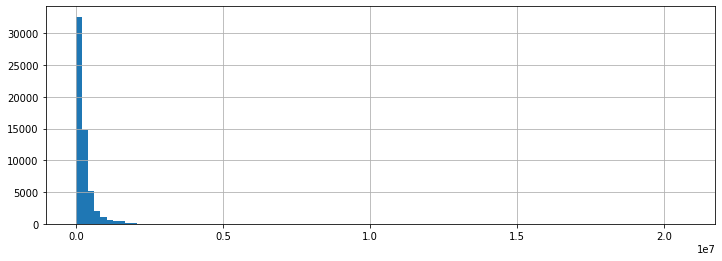

In [26]:
#Antwort
df['Approved Amount'].astype(float).hist(bins=100, figsize=(12,4))

**Quiz:** In welchen Ländern waren die vergebenen Beträge im Schnitt am Grössten? Zeigen Sie die zehn obersten an.

In [27]:
#Antwort
df.groupby('Institution Country')['Approved Amount'].mean().sort_values(ascending=False).head(10)

Institution Country
Portugal       703000.000000
Austria        354064.666667
Norway         294984.000000
Switzerland    294532.191935
Singapore      251470.000000
Ireland        245219.650000
Germany        213070.585833
Netherlands    212326.090909
Denmark        149886.527000
Spain          148505.000000
Name: Approved Amount, dtype: float64

In [28]:
# Time for a break ...

## Werte Kategorisieren

Sagen wir mal, wir interessieren uns für die Institutionen in der Schweiz, die vom SNF Geld gekriegt haben.

Wir erstellen erstmal ein Dataframe, in dem nur diese Institutionen vorkommen:

In [29]:
df_swiss = df[df['Institution Country'] == 'Switzerland']

Und lassen uns dann eine Liste aller Universitäten anzeigen, die in diesem Dataframe vorkommen:

In [30]:
df_swiss['University'].unique()

array(['University of Geneva - GE',
       'Non-profit organisations (libraries, museums, academies, foundations) and administration - NPO',
       'University of Basel - BS', 'University of Fribourg - FR',
       'University of Zurich - ZH',
       'Swiss Federal Institute for Forest, Snow and Landscape Research  - WSL',
       'University of Berne - BE', 'ETH Zurich - ETHZ',
       'University of Lausanne - LA', 'University of Neuchatel - NE',
       'Graduate Institute of International and Development Studies - IHEID',
       'University of St.Gallen - SG',
       'Other Research Institutes - FINST',
       'Pädagogische Hochschule Graubünden - PHGR', 'EPF Lausanne - EPFL',
       'Pädagogische Hochschule Zürich - PHZH',
       'Companies/  Private Industry - FP', 'University of Lucerne - LU',
       'Unassignable - NA', 'Swiss Institute of Art Research - SIK-ISEA',
       'Dipartimento formazione e apprendimento, Scuola universitaria professionale della Svizzera italiana - SUPSI-DF

Schnell wird klar: In dieser Liste sind nicht nur Universitäten, sondern auch Fachhochschulen und andere Institutionen enthalten.

Wie gehen wir vor, wenn wir die Daten nach diesen Typen klassifizieren wollen? Mit anderen Worten, zB separate Durchschnittswerte ausrechnen für Universitäten, Fachhochschulen, etc?

### Methode 1: contains, replace

Die allereinfachste (und nicht sehr empfehlenswerte) Variante ist, einfach zu checken, ob in einem bestimmten Eintrag das Wort "University" vorkommt.

Wir können dafür die Funktion `str.contains()` verwenden - heraus kommt eine Liste von True/False-Werten, die wir weiter verwenden können...

In [31]:
df_swiss['University'].str.contains('University')

1         True
2        False
3         True
4        False
5         True
         ...  
69472     True
69473     True
69474    False
69475     True
69477     True
Name: University, Length: 51358, dtype: object

Zum Beispiel so:

In [32]:
df_swiss['Institution Type'] = df_swiss['University'].str.contains('University')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


... oder vielleicht doch nicht so :-) Der Grund für die obige Warnung ist: Wir arbeiten auf einem Slice eines Dataframes, das kann Probleme machen (muss aber nicht).

Um sicher zu sein: `.copy()` verwenden, um im Memory eine physische Kopie des Dataframes zu erstellen

In [33]:
df_ch = df_swiss.copy()

In [34]:
df_ch['Institution Type'] = df_ch['University'].str.contains('University')

In [35]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,True
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,False
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,True


Nun können wir die True/False-Werte mit generischen Einträgen ersetzen. Dafür gibt es `replace()`:

In [36]:
df_ch['Institution Type'] = df_ch['Institution Type'].replace(True, 'University')

In [37]:
df_ch['Institution Type'] = df_ch['Institution Type'].replace(False, 'Other')

In [38]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University


Wir können nun zB ausrechnen, wie viel Geld die Universitäten und die übrigen Institutionen in der Summe gekriegt haben:

In [39]:
df_ch.groupby('Institution Type')['Approved Amount'].sum()

Institution Type
Other         4.750437e+09
University    1.032450e+10
Name: Approved Amount, dtype: float64

Aber wie gesagt, es gibt bessere Wege. (zB haben wir nun Einträge wie "Université" nicht berücksichtigt.

### Methode 2: apply, isin

Auch nicht wirklich super, aber immerhin besser als vorher: Wir schreiben eine eigene Funktion zur Klassifizierung von Universitäten.

Diese Funktion können wir unendlich kompliziert machen, wenn wir wollen. Hier halten wir sie bewusst einfach.

In [40]:
def categorize_institution(institution):
    
    #Ist eine Institution eine Uni? Hier eine Liste von Wörtern, nach denen wir suchen.
    university_names = ["University", "Universität", "Université"]
    
    #Gehen wir die Liste durch...
    for university_name in university_names:
        
        #Kommt das Wort im String, den wir klassifizieren wollen, mehr als null mal vor?
        if str(institution).count(university_name) > 0:
            
            #Dann ist es eine Universität
            return "University"
    
    #sonst nicht
    return "Other"

Wir testen die Funktion...

In [41]:
categorize_institution("University of Zurich")

'University'

In [42]:
categorize_institution("Fachhochschule Nordwestschweiz")

'Other'

... und wenden sie auf die Spalte "University" an.

In [43]:
df_ch['University'].apply(categorize_institution)

1        University
2             Other
3        University
4             Other
5        University
            ...    
69472    University
69473    University
69474         Other
69475    University
69477    University
Name: University, Length: 51358, dtype: object

Das Resultat kommt nun in die Spalte "Institution Type"

In [44]:
df_ch['Institution Type'] = df_ch['University'].apply(categorize_institution)

In [45]:
df_ch.head(3)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University


Wir sind jetzt ziemlich schnell durch `df.apply()` durchgegangen. Macht nix, wir kommen später nochmals drauf zurück. Man kann die Funktion übrigens auch auf ganze Zeilen anwenden, mehr dazu später.

**Quiz:** Basierend auf unserer neuen Klassifizierung: Zeichnen Sie einen Balkenchart, der die durchschnittliche Vergabesumme für Universitäten und Nicht-Universitäten anzeigt.

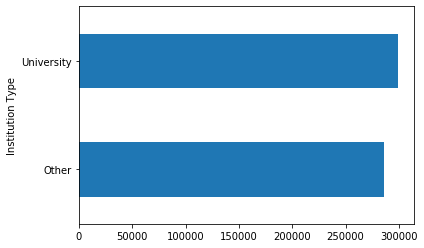

In [46]:
#Antwort
df_ch.groupby('Institution Type')['Approved Amount'].mean().plot(kind='barh')

### Methode 3: merge

Und nun zur saubersten Art, wie man die Institutionen in dieser Tabelle hier klassifizieren sollte: von Hand.

Wie ziehen uns nochmals die Liste der unique Values, diesmal gleich als Dataframe:

In [47]:
df_unique = pd.DataFrame(df_ch['University'].unique())
df_unique

,0
0,University of Geneva - GE
1,"Non-profit organisations (libraries, museums, ..."
2,University of Basel - BS
3,University of Fribourg - FR
4,University of Zurich - ZH
...,...
79,Pädagogische Hochschule Schaffhausen - PHSH
80,Staatsunabhängige Theologische Hochschule Base...
81,Facoltà di Teologia di Lugano - FTL
82,Fernfachhochschule Schweiz (member of SUPSI) -...


Weil es einfacher geht, bearbeiten wir die Liste in einem externen Programm... mit der Funktion `to_csv()`

In [48]:
df_unique.to_csv('dataprojects/SNF/klassifizieren.csv', index=False)

... im Excel, oder anderswo bearbeiten, und wieder laden: (Ich habe das hier schonmal vorbereitet)

In [49]:
df_unique_edited = pd.read_csv('dataprojects/SNF/klassifiziert.csv')

In [50]:
df_unique_edited

,University,New Type
0,AO Research Institute - AORI,Other
1,Berne University of Applied Sciences - BFH,Fachhochschule
2,Biotechnology Institute Thurgau - BITG,Other
3,Cantonal hospital of St.Gallen - KSPSG,Spital
4,Cardiocentro Ticino - CT,Other
...,...,...
78,University of St.Gallen - SG,Universität
79,University of Zurich - ZH,Universität
80,Zürcher Fachhochschule - ZFH,Fachhochschule
81,Zurich University of Applied Sciences - ZHAW,Fachhochschule


Wir haben jetzt zwei Tabellen: `df_ch` (die grosse Datentabelle) und `df_unique` (die Klassifizierungen).

Diese zwei Tabellen können wir nun verknüpfen, und zwar mit der Funktion `merge()`

In [51]:
df_ch_classified = df_ch.merge(df_unique_edited, how='left', left_on='University', right_on='University')
df_ch_classified

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
0,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University,Universität
1,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.0,NaN,Other,Other
2,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abt. Handschriften und Alte Drucke Bibliothek ...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.0,NaN,University,Universität
3,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.0,NaN,Other,Other
4,8,1000-000008,Die schweizerische Wirtschaftspolitik seit dem...,NaN,Kleinewefers Henner,Project funding (Div. I-III),Project funding,"Séminaire de politique économique, d'économie ...",Switzerland,University of Fribourg - FR,10203,Economics,"Humanities and Social Sciences;Economics, law",10203,01.01.1976,31.12.1978,53009.0,NaN,University,Universität
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51353,183786,IZSEZ0_183786,"Minimising Risks, Selling Promises? Reproducti...",NaN,Maffi Irene,Scientific Exchanges,Science communication,Institut des sciences sociales Université de L...,Switzerland,University of Lausanne - LA,10602,Health,"Humanities and Social Sciences;Sociology, soci...",10602/10403,01.10.2018,31.12.2018,7050.0,risks; promises; technoscientific innovations ...,University,Universität
51354,183799,10BP12_183799,Gender Innovation and Migration in Switzerland,Gender Innovation and Migration in Switzerland,Falk Francesca,Open Access Books,Science communication,Departement für Historische Wissenschaften - Z...,Switzerland,University of Fribourg - FR,10301,General history (without pre-and early history),Humanities and Social Sciences;Theology & reli...,10301/10302,01.09.2018,28.02.2019,9500.0,Geschlechtergeschichte; Geschichte des soziale...,University,Universität
51355,183810,10BP12_183810,Dépasser les bornes,NaN,Messer Marc Antoine,Open Access Books,Science communication,Communauté d'études pour l'aménagement du terr...,Switzerland,EPF Lausanne - EPFL,10407,Architecture and Social urban science,"Humanities and Social Sciences;Art studies, mu...",10407/10202,01.09.2018,28.02.2019,25000.0,urbanisme; planification; métropole; frontière...,Other,Universität
51356,183815,10BP12_183815,Perspectives on treating hypertension in old a...,Perspectives on treating hypertension in old a...,Streit Sven,Open Access Books,Science communication,Berner Institut für Hausarztmedizin BIHAM Univ...,Switzerland,University of Berne - BE,30701,Internal Medicine,Biology and Medicine;Clinical Medicine,30701/30806,01.09.2018,28.02.2019,2080.0,Blood pressure; Cognitive function; Oldest-old...,University

Die Spalte "New Type" wurde nun zur Tabelle "df_ch" hinzugefügt, und zwar genau dort, wo es zum Eintrag in "University" passt!

Schauen wir kurz, wie viele Einträge es von welchem Typ hat:

In [52]:
df_ch_classified['New Type'].value_counts()

Universität       45823
Other              4579
Fachhochschule      793
Spital              162
Name: New Type, dtype: int64

Ging auch wirklich nichts vergessen?

In [53]:
df_ch_classified['New Type'].value_counts(dropna=False)

Universität       45823
Other              4579
Fachhochschule      793
Spital              162
NaN                   1
Name: New Type, dtype: int64

**Oops!** Es hat einen fehlenden Eintrag drin.

Was ist das für ein Eintrag?

In [54]:
df_ch_classified[df_ch_classified['New Type'].isnull()]

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,New Type
24179,101005,50CH40-101005,SELECTS 2003: Eidgenössische Wahlen 2003,SELECTS 2003: Federal elections 2003,Malaguerra Carlo,Swiss Priority Programmes (SPPs),Programmes,Schweizerische Akademie der Geistes-und Sozial...,Switzerland,NaN,10202,Political science,"Humanities and Social Sciences;Sociology, soci...",10202,01.02.2003,31.01.2004,100000.0,NaN,Other,NaN


Sieht nach einem grundsätzlich validen Projekt aus. Wir klassifizieren diesen Eintrag kurzerhand auf "Other":

In [55]:
df_ch_classified.loc[24179, "New Type"] = "Other"

In [56]:
df_ch_classified.loc[24179]

Project Number                                                             101005
Project Number String                                               50CH40-101005
Project Title                            SELECTS 2003: Eidgenössische Wahlen 2003
Project Title English                        SELECTS 2003: Federal elections 2003
Responsible Applicant                                            Malaguerra Carlo
Funding Instrument                               Swiss Priority Programmes (SPPs)
Funding Instrument Hierarchy                                           Programmes
Institution                     Schweizerische Akademie der Geistes-und Sozial...
Institution Country                                                   Switzerland
University                                                                    NaN
Discipline Number                                                           10202
Discipline Name                                                 Political science
Discipline Name 

**Quiz:** Kategorisieren Sie die Einträge nach dem Herkunftsland der Universität (erstellen Sie dazu ein neues Feld "Country Type" mit den Einträgen "Switzerland" oder "Other". Wie viele Projekte kommen aus der Schweiz, wie viele aus anderen Ländern?

**Achtung** Wechseln Sie jetzt wieder zum originalen Dataframe, "df"

In [57]:
#Neues, leeres Feld 'Country Type' erstellen
df['Country Type'] = ""

In [58]:
# Country Type = 'Switzerland', falls Switzerland
df.loc[df['Institution Country'] == 'Switzerland', 'Country Type'] = "Switzerland"

In [59]:
# Country Type = 'Other', falls nicht
df.loc[df['Institution Country'] != 'Switzerland', 'Country Type'] = "Other"

In [60]:
# Auswertung nach Country Type
df['Country Type'].value_counts(dropna=False)

Switzerland    51358
Other          18120
Name: Country Type, dtype: int64

## Plotting Level 2

Nun wollen wir darstellen, wie sich die Projekte über die Zeit hinweg in der Schweiz und in den übrigen Ländern entwickelt haben. Es geht also darum, zwei verschiedene Serien auf einer Grafik einzuzeichnen.

Wir wenden dazu jetzt einen etwas faulen Trick an, um eine neue Spalte mit dem Jahr zu generieren (eigentlich gäbe es dazu noch einen speziellen Datentyp, aber den schauen wir ein anderes Mal an).

In [61]:
df['Year'] = df['Start Date'].str[6:]

Check, ob das einigermassen funktioniert hat...

In [62]:
df['Year'].value_counts(dropna=False).sort_index()

1975     205
1976     542
1977     564
1978     556
1979     616
1980     600
1981     614
1982     628
1983     682
1984     703
1985     684
1986     938
1987    1099
1988    1105
1989    1789
1990    1441
1991    1240
1992    1148
1993    1519
1994    1493
1995    1328
1996    1722
1997    1577
1998    1353
1999    1388
2000    1704
2001    1713
2002    1624
2003    1835
2004    1858
2005    2104
2006    2106
2007    2175
2008    2265
2009    2466
2010    2596
2011    2541
2012    2890
2013    2837
2014    2911
2015    2841
2016    2696
2017    2861
2018    1916
2019       3
NaN        2
Name: Year, dtype: int64

Jetzt plotten wir die Gesamtsumme der gesprochenen Gelder nach Jahr. Zuerst für die Schweiz ...

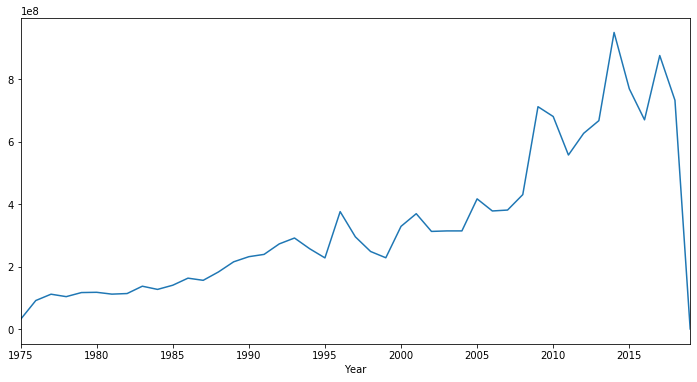

In [63]:
df[df['Country Type'] == "Switzerland"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... dann für die anderen Länder ...

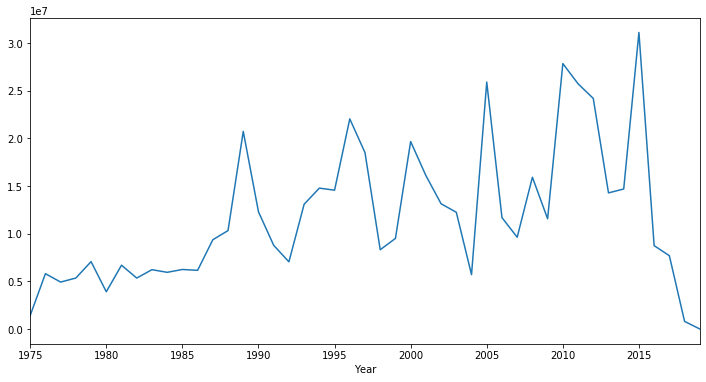

In [64]:
df[df['Country Type'] == "Other"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

... und schliesslich für beide Ländertypen:

### Methode 1: Zwei verschiedene Linien einzeichnen

Die sicherste Methode, um mehrere Kurven auf derselben Grafik darzustellen, ist `ax=`.

Wir speichern erste einen Plot als "chart1" und sagen dem zweiten Plot dann, sich zu "chart1" hinzuzugesellen.

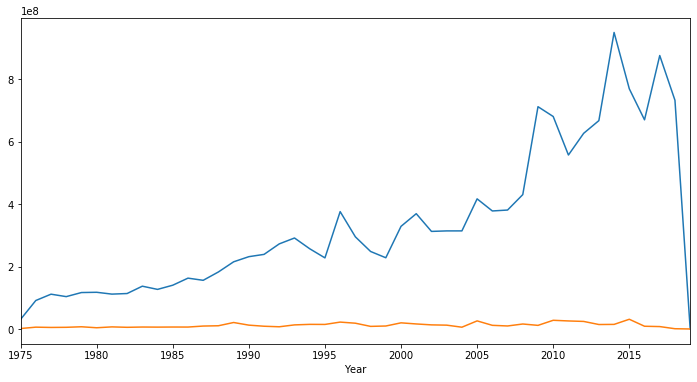

In [65]:
chart1 = df[df['Country Type'] == "Switzerland"].groupby('Year')['Approved Amount'].sum().plot(figsize=(12,6))

df[df['Country Type'] == "Other"].groupby('Year')['Approved Amount'].sum().plot(ax=chart1)

### Methode 2: Doppelt groupby, unstack

In diesem Fall gibt es allerdings noch eine elegantere Variante. Und zwar mit `groupby()`.

Diese Methode funktioniert nicht nur mit einem Level, sondern auch mit zwei. Die Summierung wird einerseits über die Jahre ("Years") gemacht und andererseits für die einzelenen Ländertypen ("Country Types"):

In [66]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum()

Year  Country Type
1975  Other           1.422727e+06
      Switzerland     3.074641e+07
1976  Other           5.798550e+06
      Switzerland     9.121748e+07
1977  Other           4.920319e+06
                          ...     
2017  Switzerland     8.762168e+08
2018  Other           7.937350e+05
      Switzerland     7.328224e+08
2019  Other           0.000000e+00
      Switzerland     5.689200e+04
Name: Approved Amount, Length: 90, dtype: float64

Um diese Werte zu plotten, müssen wir Pandas die Tabelle allerdings etwas anders zur Verfügung stellen: im Wide-Format (dazu später noch mehr). Wir können dazu die Funktion `unstack()` verwenden:

In [67]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack()

Country Type,Other,Switzerland
Year,,
1975,1422727.00,3.074641e+07
1976,5798550.00,9.121748e+07
1977,4920319.00,1.114744e+08
1978,5344733.00,1.036575e+08
1979,7064763.00,1.167330e+08
1980,3904041.00,1.175633e+08
1981,6689602.00,1.116979e+08
1982,5339538.00,1.135752e+08
1983,6220266.00,1.370960e+08


Letzter Schritt: `plot()`

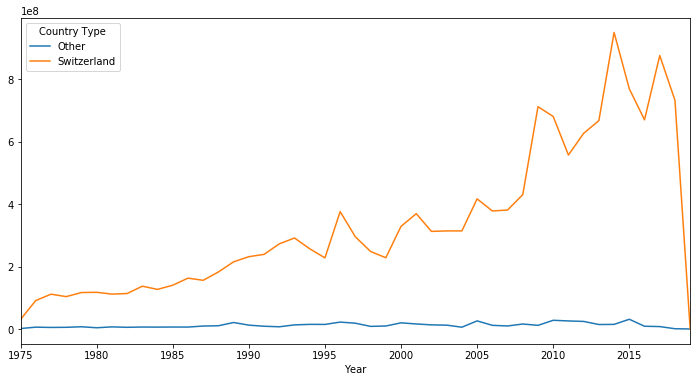

In [68]:
df.groupby(['Year', 'Country Type'])['Approved Amount'].sum().unstack().plot(figsize=(12,6))

**Quiz:** Plotten Sie den durchschnittlichen Betrag, den Universitäten, Fachhochschulen, Spitäler und andere Institutionen über die Jahre erhalten haben - alles auf derselben Grafik. Benutzen Sie dazu wieder das Dataframe "df_ch_classfied" – Achtung, Sie müssen zuerst wieder eine Jahresspalte erstellen.

In [69]:
# Spalte 'Year' in df_ch_classified erstellen
df_ch_classified['Year'] = df_ch_classified['Start Date'].str[6:]

In [70]:
# Liste, nach Jahr und New Type gruppiert
df_ch_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean()

Year  New Type      
1975  Other             174150.941176
      Spital             76234.750000
      Universität       161652.364706
1976  Other             230368.245283
      Spital             62150.000000
                            ...      
2018  Fachhochschule    259342.129630
      Other             444559.290168
      Spital            861597.750000
      Universität       545241.954403
2019  Universität        56892.000000
Name: Approved Amount, Length: 164, dtype: float64

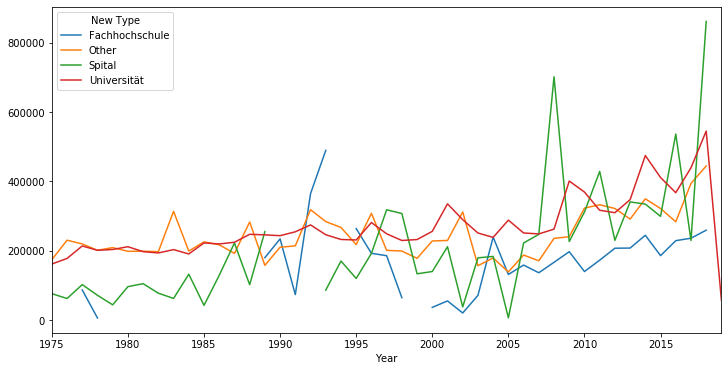

In [71]:
# Plot
df_ch_classified.groupby(['Year', 'New Type'])['Approved Amount'].mean().unstack().plot(figsize=(12,6))

**Schlussfrage:** Haben wir nun bereits eine Story gefunden? Wenn ja, was könnte sie sein? Wenn nein, welches wären weitere Auswertungen, die man basierend auf diesen Daten machen könnte?

In [72]:
#Antwort in Textform...
#Zum Beispiel: Auswertung der Profile von einzelnen Forschern.

In [73]:
df['Responsible Applicant'].value_counts()

Kneubühl Fritz             47
Güntherodt Hans-Joachim    47
Pestalozzi Karl            46
Günter Peter               41
Stocker Thomas             39
                           ..
Burri Renate                1
Schläppy Romain             1
Giacometti Marco            1
Haffter Pascal              1
Gallo Fernanda              1
Name: Responsible Applicant, Length: 26321, dtype: int64

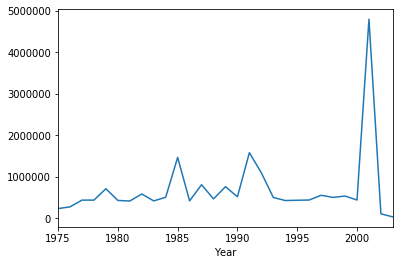

In [74]:
df[df['Responsible Applicant'] == 'Güntherodt Hans-Joachim'].groupby('Year')['Approved Amount'].sum().plot()

# Übung

Wir klassifizieren die Projekte nun nach Forschungsdisziplin und werten aus, welche Disziplinen zu welchem Zeitpunkt wie viel Geld gekriegt haben (wir wenden also Methode 3 an).

**Schritt 1:** Wir erstellen eine Liste der einzigartigen Einträge im Datenfeld "Discipline Name" und speichern sie als csv-Datei ab. (Arbeiten Sie mit dem dataframe "df_ch")

In [75]:
#Dataframe aus einzigartigen Disziplinennamen erstellen
df_disciplines = pd.DataFrame(df_ch['Discipline Name'].unique())
df_disciplines

,0
0,Educational science and Pedagogy
1,Philosophy
2,Swiss history
3,Ancient history and Classical studies
4,Economics
...,...
153,Arts
154,"Music, Theatre"
155,Applied psychology
156,Applied linguistics


In [76]:
# Dataframe als csv speichern
df_disciplines.to_csv('dataprojects/SNF/disziplinen.csv', index=False)

**Schritt 2:** Wir bearbeiten das csv-File extern und klassifizieren nach unserer Wahl

In [77]:
#extern bearbeiten...

**Schritt 3:** Wir fügen die Klassifizierung der Disziplinen in unsere Datenliste (Arbeiten Sie mit df) ein

In [78]:
# Einlesen des bearbeiteten csv-Files
df_disciplines_classified = pd.read_csv('dataprojects/SNF/disziplinen-klassifiziert.csv')
df_disciplines_classified.head(3)

,Discipline Name,Discipline Type
0,Educational science and Pedagogy,Social Sciences
1,Philosophy,Social Sciences
2,Swiss history,Social Sciences


In [79]:
# Verbinden Sie das dataframe "df_ch" mit der Klassifizierung, abspeichern unter neuem dataframe df_ch_classified
df_ch_classified = df_ch.merge(df_disciplines_classified, how='inner', on='Discipline Name')
df_ch_classified.head(2)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,Institution Type,Discipline Type
0,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.0,NaN,University,Social Sciences
1,21,1000-000021,Struktur und Funktion didaktischer Bezugssyste...,NaN,Santini Bruno,Project funding (Div. I-III),Project funding,Forschungszentrum FAL,Switzerland,University of Fribourg - FR,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1977,204018.0,NaN,University,Social Sciences


**Schritt 4:** Auswertungen

- Wie viele Projekte von welchem Disziplinen-Typ wurden durchgeführt?

In [80]:
df_ch_classified['Discipline Type'].value_counts()

Natural Sciences    20637
Medicine            15365
Social Sciences     15356
Name: Discipline Type, dtype: int64

- Welche Disziplinen-Typen haben meisten Geld gekriegt?

In [81]:
df_ch_classified.groupby('Discipline Type')['Approved Amount'].sum()

Discipline Type
Medicine            5.733083e+09
Natural Sciences    6.165316e+09
Social Sciences     3.176642e+09
Name: Approved Amount, dtype: float64

- Wie viel kosten Projekte der Disziplinen-Typen im Durchschnitt? Im Median?

In [82]:
df_ch_classified.groupby('Discipline Type')['Approved Amount'].mean()

Discipline Type
Medicine            374222.132231
Natural Sciences    299388.905967
Social Sciences     208031.589618
Name: Approved Amount, dtype: float64

In [83]:
df_ch_classified.groupby('Discipline Type')['Approved Amount'].median()

Discipline Type
Medicine            260842.0
Natural Sciences    196081.0
Social Sciences     121971.0
Name: Approved Amount, dtype: float64

**Schritt 5:** Plot einer Auswertung

Wie viel Geld haben die verschiedenen Disziplinentypen im Jahresverlauf insgesamt gekriegt?

In [84]:
#Wir müssen auf df_ch_classified nochmals den Trick mit der Jahresspalte anwenden
df_ch_classified['Year'] = df_ch_classified['Start Date'].str[6:]

In [85]:
# Tabelle anzeigen: Summe der gesprochenen Gelder, gruppiert nach Jahr und Disziplinentyp
df_ch_classified.groupby(['Year', 'Discipline Type'])['Approved Amount'].sum().unstack()

Discipline Type,Medicine,Natural Sciences,Social Sciences
Year,,,
1975,1.277342e+07,1.283916e+07,5.133826e+06
1976,3.945418e+07,4.030315e+07,1.146016e+07
1977,4.146789e+07,5.275032e+07,1.725615e+07
1978,4.544383e+07,4.008860e+07,1.812504e+07
1979,4.164585e+07,5.435762e+07,2.072956e+07
1980,5.372031e+07,4.422708e+07,1.961593e+07
1981,4.363928e+07,4.803530e+07,2.002329e+07
1982,4.150669e+07,4.732691e+07,2.474160e+07
1983,4.869910e+07,6.506768e+07,2.332920e+07


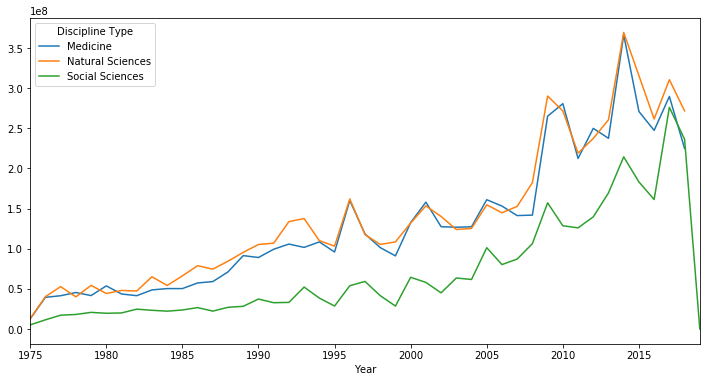

In [86]:
#Plot als Liniendiagramm
df_ch_classified.groupby(['Year', 'Discipline Type'])['Approved Amount'].sum().unstack().plot(figsize=(12,6))